# Individual Assignment 2: Evaluating Linear Models

-----------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-------------------------------

**Varsha Musku**

Let's put all of your skills to work on a basic regression modeling notebook!



[Download the CT Real Estate Transactions data here](https://drive.google.com/file/d/12m6UYYt0Osa3JLLfPZRLlBipRUS9ixGd/view?usp=sharing), drag onto your Google Drive, mount your Drive, then read the dataframe as `df`. Then...


10 pts each.
* Q1) Drop any rows where the `AssessedValue` is greater than 1 million USD
* Q2) Count how many rows have missing values, then drop any rows with missing values.
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.
* Q4) Count how many unique values are in the `Town` column.
* Q5) Make a new dataframe called `tmp` of dummy variables for each value in the `Town` column. (hint: this dataframe should have 127055 rows and 169 columns, one column for each town).
* Q6) Make a new dataframe called `X` that subsets the `AssessedValue` and `ListYear` from `df`, and concatenate with your dataframe called `tmp`. Hint: This dataframe should have 171 columns.
* Q7) Subset `SaleAmount` from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition.
* Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.

Please use nice subheaders/titles so that your code is easy to grade.



In [1]:
# here is a nice way to download as a shareable link - you just need to 'steal' the ID of the file and you can use gdown
# after you run this, the file will be downloaded to your local runtime and your are ready to rock!
# of course, local files on your runtime are deleted after you close the session, but this is OK.

# https://drive.google.com/file/d/1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ/view?usp=sharing
!gdown 1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ

Downloading...
From: https://drive.google.com/uc?id=1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ
To: /content/Real_Estate_Sales_2014-2016.csv
100% 15.4M/15.4M [00:00<00:00, 86.4MB/s]


In [30]:
import pandas as pd
df = pd.read_csv('Real_Estate_Sales_2014-2016.csv')


#**Question 1 : Filtering the dataset with Assesed value less than 1 million USD**

In [31]:
#Q1) Drop any rows where the AssessedValue is greater than 1 million USD

df = df[df["AssessedValue"] <= 1000000]


#**Question 2 : Count of missing Values and Dropping of the rows with missing values**

In [14]:
#Q2) Count how many rows have missing values, then drop any rows with missing values.

sumofmissing = df.isnull().any(axis =1).sum()
print(sumofmissing)
df = df.dropna()


0


#**Question 3 : Head and info of the Dataframe**

In [5]:
#Q3) Examine the head of the dataframe and check the column types using .info()
#to ensure that all numeric columns are appropriately converted as such.

print(df.head())
print(df.info())

   ID  SerialNumber  ListYear DateRecorded     Town            Address  \
1   2         14011      2014    1/14/2015  Andover    1 JUROVATY LANE   
2   3         15006      2015   11/30/2015  Andover        1 ROSE LANE   
3   4         14044      2014    9/28/2015  Andover  10 PINE RIDGE  DR   
4   5         14035      2014    8/10/2015  Andover       101 WALES RD   
5   6         15051      2015    9/28/2016  Andover    107 LAKESIDE DR   

   AssessedValue  SaleAmount  SalesRatio PropertyType ResidentialType  
1         153100    190000.0    0.805789  Residential   Single Family  
2         102900     50000.0    2.058000  Residential   Single Family  
3         108700    128368.0    0.846784  Residential   Single Family  
4         164000    230000.0    0.713043  Residential   Single Family  
5         188400    226000.0    0.833628  Residential   Single Family  
<class 'pandas.core.frame.DataFrame'>
Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column      

#**Question 4: Count of Unique values in Town Column**

In [6]:
#Q4) Count how many unique values are in the Town column.

df['Town'].nunique()

169

#**Question 5: New dataframe with dummy variable , Town Column**

In [7]:
#Q5) Make a new dataframe called tmp of dummy variables for each value in the Town column.
 #(hint: this dataframe should have 127055 rows and 169 columns, one column for each town).


tmp = pd.get_dummies(df['Town'], prefix='Town')
print(tmp.shape)


(127055, 169)


#**Question 6: Dataset X - Assesed value and ListYear**

In [8]:
#Q6) Make a new dataframe called X that subsets the AssessedValue and ListYear from df, and concatenate
#with your dataframe called tmp. Hint: This dataframe should have 171 columns.

X1 = df[["AssessedValue","ListYear"]]
X = pd.concat([X1,tmp],axis=1)
X.shape


(127055, 171)

#**Question 7: Dataset Y : SaleAmount**

In [9]:
#Q7) Subset SaleAmount from df and assign to a variable called y

y = df["SaleAmount"]


#**Question 8 : Splitting of Train and Test data**

In [16]:
#Q8) Convert X and y to numpy arrays. Split your data in X_train, X_test, y_train, y_test
# using your 7 digit student ID as the random seed and an 80/20 split.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
X = np.array(X)
y = np.array(y)
sid = 3157361
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=sid)


#**Question 9 : Linear Regression model and Mean absolute error**

In [17]:
# Q9) Fit a linear regression model. Calculate mean absolute error for each partition.

model = LinearRegression()
model.fit(X_train,y_train)

yTrainpred = model.predict(X_train)
yTestpred = model.predict(X_test)

MAETrain = mean_absolute_error(y_train,yTrainpred)
MAETest = mean_absolute_error(y_test,yTestpred)

print(MAETrain)
print(MAETest)

91018.06530093128
95239.46691902458


#**Question 10 : Scatterplot matrix**

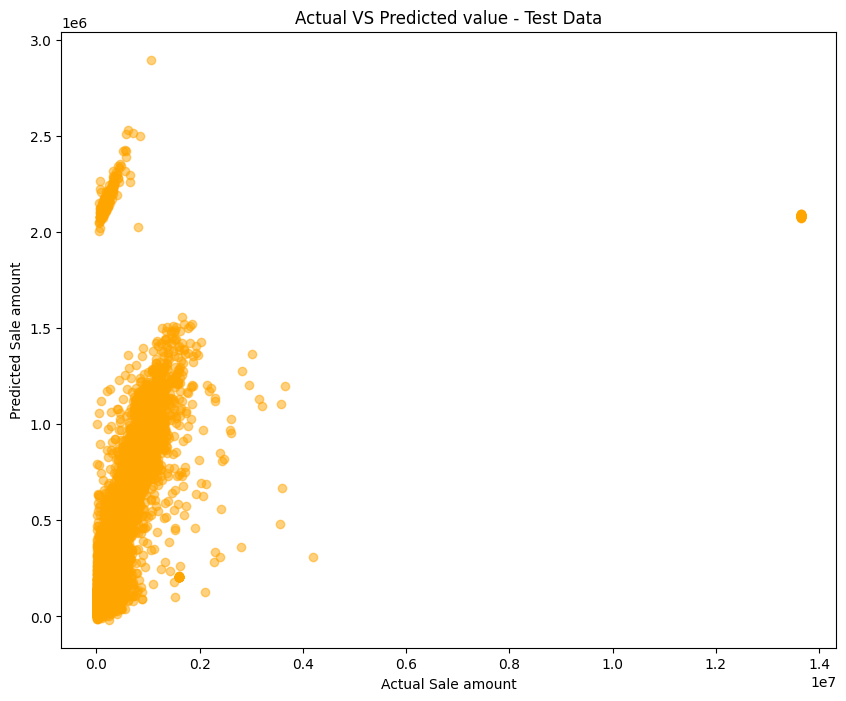

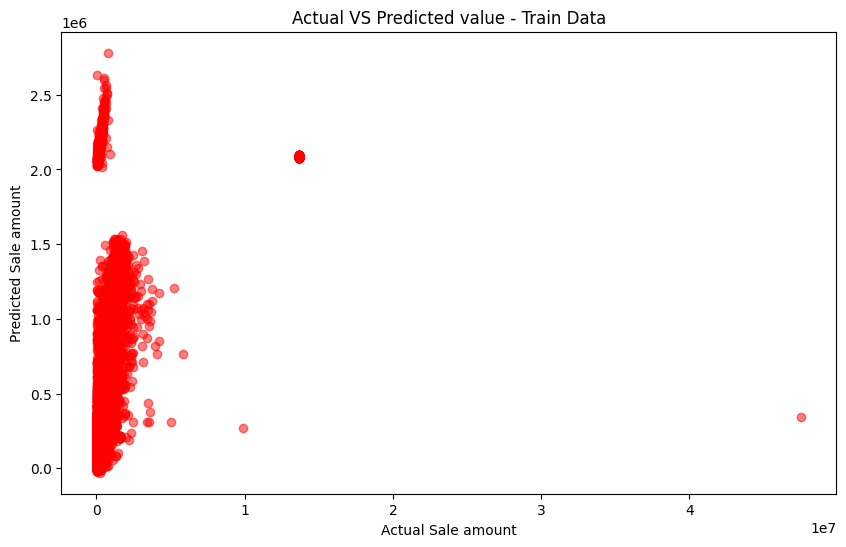

In [22]:
#Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.

plt.figure(figsize=(10,8))
plt.scatter(y_test,yTestpred,alpha = 0.5,color = 'Orange')
plt.title('Actual VS Predicted value - Test Data')
plt.xlabel('Actual Sale amount')
plt.ylabel('Predicted Sale amount')

plt.show()


plt.figure(figsize=(10,6))
plt.scatter(y_train,yTrainpred,alpha = 0.5,color = 'Red')
plt.title('Actual VS Predicted value - Train Data')
plt.xlabel('Actual Sale amount')
plt.ylabel('Predicted Sale amount')


plt.show()

